In [10]:
import numpy as np
import random as rndm
import gym
import math
import time
import matplotlib.pyplot as plt

In [13]:
env = gym.make("CartPole-v1")

#First generate an array of 4 random numbers from -1 to 1. Then multiply by the max absolute values for observations matrix.
observation_space_actual = [2.4, 2.5, 12*2*math.pi/360, 1]
Snew = np.random.rand(4)*2 - 1 #Generate numbers from -1 to 1
print(Snew)
Snew = Snew * observation_space_actual #Generate random states within correct range.
print(Snew)

[ 0.70433779  0.613976   -0.90613441 -0.69773671]
[ 1.69041071  1.53494001 -0.18978035 -0.69773671]


In [ ]:
n = 60000
plot_episodes = np.linspace(0, n, int(n/1000 + 1)) #every 2000 episodes we tale a data point
plot_rewards = plot_episodes
print(plot_episodes.size)
print(plot_rewards.size)
plot_rewards = plot_rewards*2

61
61


In [ ]:
DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50] #first two variables not as important as the other two.
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1]) #steps for each.

epsilon = 1

epsilon_decay_value = 0.99995

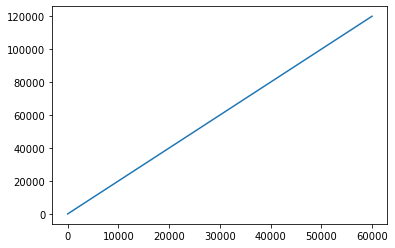

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(plot_episodes, plot_rewards);  # Plot some data on the axes.

In [ ]:
#finding neighbouring states of S

#try a row of 9 squares
S = 3
S_neighbours = np.zeros(3)
print(S_neighbours)
step = 0
i = S
for S_perturbed in [i-1,i,i+1]:
    S_neighbours[step] = S_perturbed
    step = step + 1
print(S_neighbours)

#try a 9x9 grid
S = [3,3,3,3]
S_neighbours = np.zeros((3*3*3*3,4))
print(S_neighbours)
step = 0
S_i = S[0]
S_j = S[1]
S_k = S[2]
S_l = S[3]
for i in [S_i-1, S_i, S_i+1]:
    for j in [S_j-1, S_j, S_j+1]:
        for k in [S_k-1, S_k, S_k+1]:
            for l in [S_l-1, S_l, S_l+1]:
                S_neighbours[step] = np.array([i,j,k,l])
                step = step + 1
print(S_neighbours)
    

[0. 0. 0.]
[2. 3. 4.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0

In [38]:
import pickle
Q_file = open('trained_Q.p', 'rb')
Q = pickle.load(Q_file)      #obtained a Q-matrix estimate from previous training 
Q_file.close()    

S_neighbours = tuple(np.array([14.0,11.0,0.0,0.0]).astype(int))
print(S_neighbours)
Q[S_neighbours + (1,)]

(14, 11, 0, 0)


0.9413159356013543